In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from numpy import asarray
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

**Part 1: Prepare the Data**

In [2]:
# Read csv file
file_path = Path("myopia.csv")
df = pd.read_csv(file_path)
# Preview of the dataset
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
labels = df["MYOPIC"]

In [4]:
# Dropping Myopic column
df = df.drop('MYOPIC', axis=1)

In [5]:
# standardizing dataset using scaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
print(scaled)

[[-4.20219106e-01 -1.36391690e+00 -8.92861464e-01 ...  4.98303926e-01
   9.87137728e-01  1.00324150e+00]
 [-4.20219106e-01 -3.08612235e-01 -1.71839800e-01 ... -8.75087555e-01
   9.87137728e-01  1.00324150e+00]
 [-4.20219106e-01  6.04386289e-01 -9.97682023e-03 ... -7.50233784e-01
  -1.01302987e+00 -9.96768974e-01]
 ...
 [-4.20219106e-01  1.65169621e+00  6.52187361e-01 ... -1.37450264e+00
   9.87137728e-01  1.00324150e+00]
 [-4.20219106e-01 -2.17472219e-01 -8.48716244e-01 ... -1.88391815e-01
  -1.01302987e+00 -9.96768974e-01]
 [-4.20219106e-01  1.58339808e-03 -3.48415042e-01 ... -7.50233784e-01
   9.87137728e-01  1.00324150e+00]]


**Part 2: Apply Dimensionality Reduction**

In [6]:
# Applying PCA to reduce dimensions
# Initialize PCA model
pca = PCA(n_components=0.90)

# Get principal components for the data.
iris_pca = pca.fit_transform(scaled)

In [7]:
# Transform PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(
    data = iris_pca, columns=["principal component 1", "principal component 2", "principal component 3", "principal component 4", "principal component 5"
                            , "principal component 6", "principal component 7", "principal component 8", "principal component 9", "principal component 10"]
)
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [8]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [9]:
from sklearn.manifold import TSNE
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [10]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df_myopia_pca)

In [11]:
# checking shape
tsne_features.shape

(618, 2)

In [12]:
# Prepare to plot the dataset
# The first column of transformed features
df_myopia_pca['x'] = tsne_features[:,0]

# The second column of transformed features
df_myopia_pca['y'] = tsne_features[:,1]

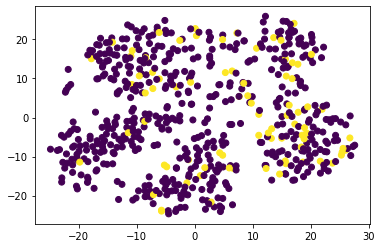

In [22]:
# Visualize the clusters
plt.scatter(df_myopia_pca['x'], df_myopia_pca['y'],c = labels)
plt.show()

In [14]:
labels.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

**Part 3: Perform a Cluster Analysis with K-means**

In [15]:
model = KMeans(n_clusters=3, random_state=5)

In [16]:
# Fitting model
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

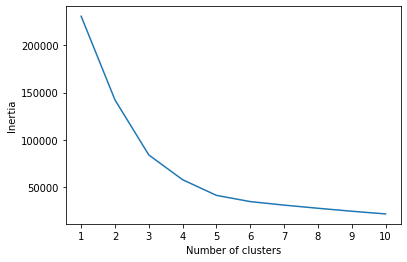

In [21]:
inertia = []
k = [1,2,3,4,5,6,7,8,9,10]

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myopia_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

**Recommendations:**

- Patients can be divided into 3 to 4 clusters. 
- It requires more data to determine the exact number of clusters.